# Using YOLOv4 and OpenCV 4 to detect custom objects (Traffic Road Signs)

I wanted to try to use OpenCV and YoloV4 in order to detect to detect custom objects (Traffic Road Signs), this is what this notebook will be about.

*Thank you Joseph Redmon and Ali Farhadi for their incredible work on **YOLO object detector** : **[YOLOv3: An Incremental Improvement](https://arxiv.org/abs/1804.02767)**, *Redmon, Joseph and Farhadi, Ali* ; arXiv, 2018.

*Thank you AlexeyAB for your* **[YOLOv4 : Algorithm](https://github.com/AlexeyAB/darknet)**.

In [1]:
# import useful libraries
import os
import numpy as np
import cv2
from yolo_utils import *

print('OpenCV version : ', cv2. __version__)
print(cv2.cuda.getCudaEnabledDeviceCount())

OpenCV version :  4.5.1
1


### Load YoloV4 labels

In [2]:
# test our function read_classes
img_file = './data/obj.names'
classNames = read_classes(img_file)
print("Classes' names :\n", classNames)

Classes' names :
 ['crosswalk', 'speedlimit', 'stop', 'trafficlight']


### YoloV4 weights and cfg files

In this part we'll upload YoloV3 Weights and cfg files in order to input them into cv2.dnn.readNetFromDarknet() and build our forward propagation with OpenCV.

In [3]:
# load the model config and weights
modelConfig_path = './cfg/yolov4-rds.cfg'
modelWeights_path = './weights/yolov4-rds_last.weights'

# read the model cfg and weights with the cv2 DNN module
neural_net = cv2.dnn.readNetFromDarknet(modelConfig_path, modelWeights_path)
# set the preferable Backend to GPU
neural_net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
neural_net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)

### Test on image files

These blocks will run object detection on images in our ****'/inputs/images/[ClassesNames]/'**** folder.

In [13]:
# defining the input frame resolution for the neural network to process
network = neural_net
height, width = 416,416

# confidence and non-max suppression threshold for this YoloV3 version
confidenceThreshold = 0.5
nmsThreshold = 0.2

# load the image
img = load_image('/speed-limit/speed-limit1.jpg')

# using convert_to_blob function : 
outputs = convert_to_blob(img, network, height, width)    
# apply object detection on the video file
bounding_boxes, class_objects, confidence_probs = object_detection(outputs, img, confidenceThreshold)   
# perform non-max suppression
indices = nms_bbox(bounding_boxes, confidence_probs, confidenceThreshold, nmsThreshold)
# draw the boxes
box_drawing(img, indices, bounding_boxes, class_objects, confidence_probs, classNames, color=(255,0,0), thickness=2)

# to save the detected image
img_save = cv2.imwrite('./results/images/yolov4res11.jpg', img)

cv2.imshow('Object detection in images', img)
cv2.waitKey()
cv2.destroyAllWindows()

Number of objects detected :  1 

Bounding box coordinates in the frame :  x :  62 || y :  29 || w :  174 || h : 237 



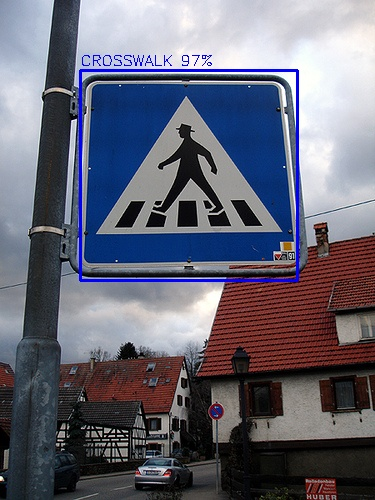

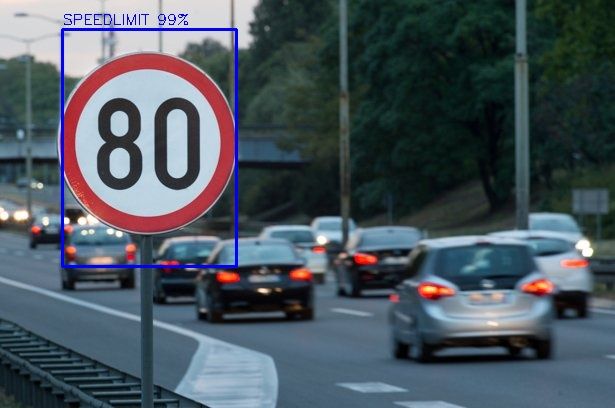

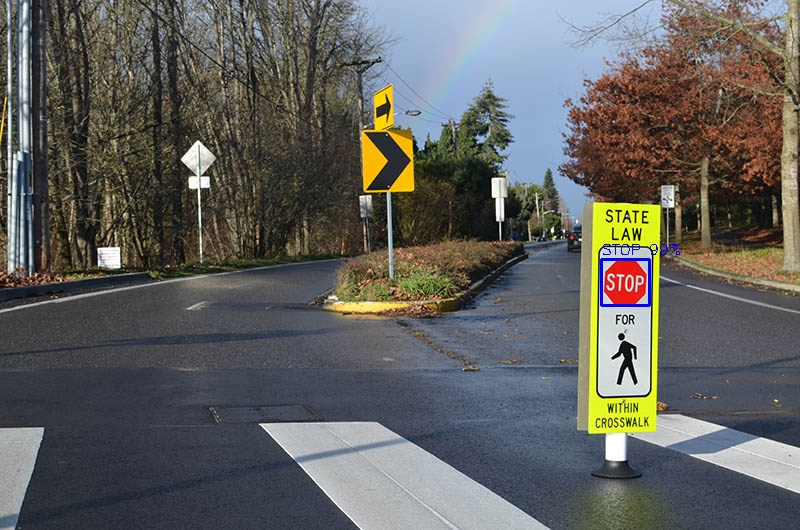

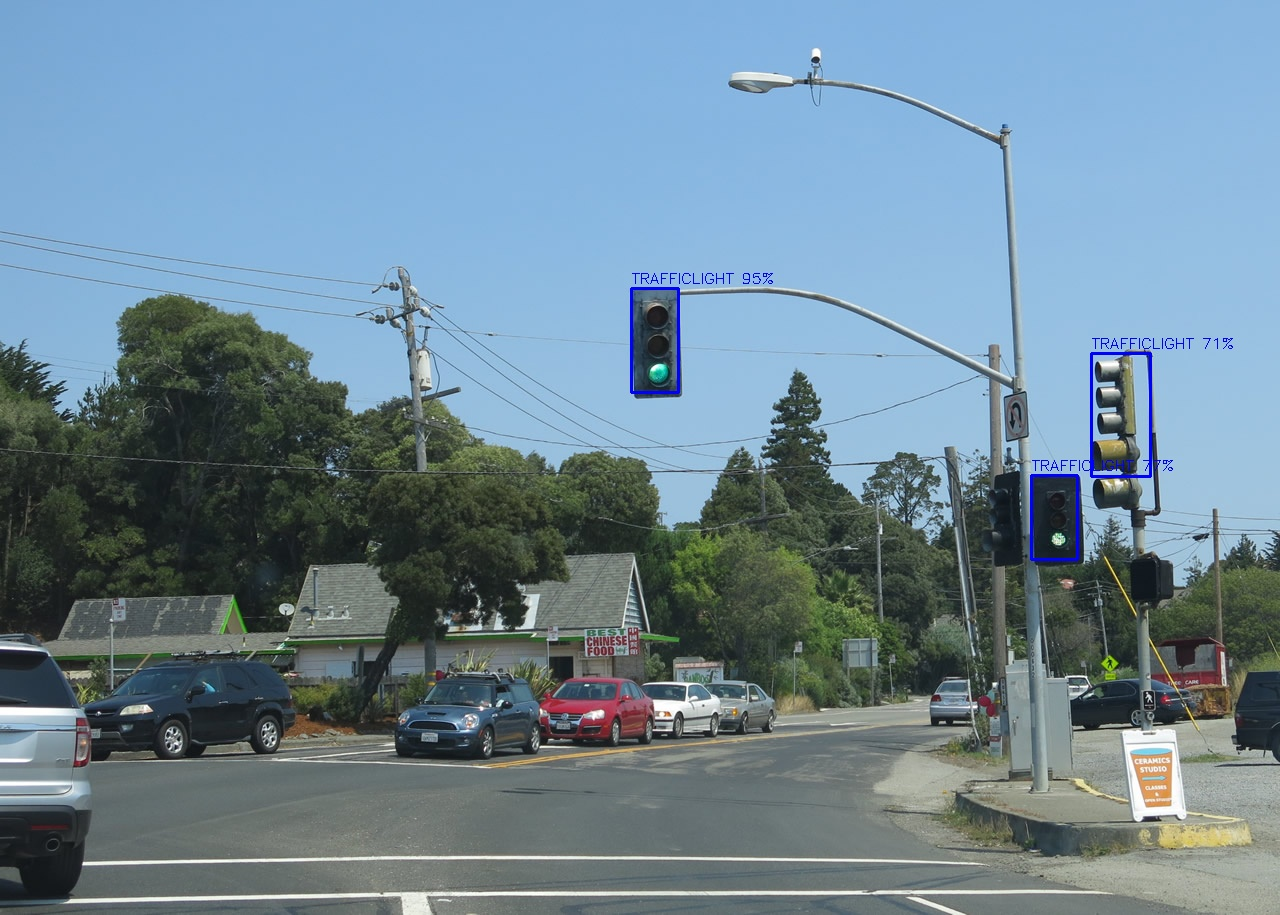

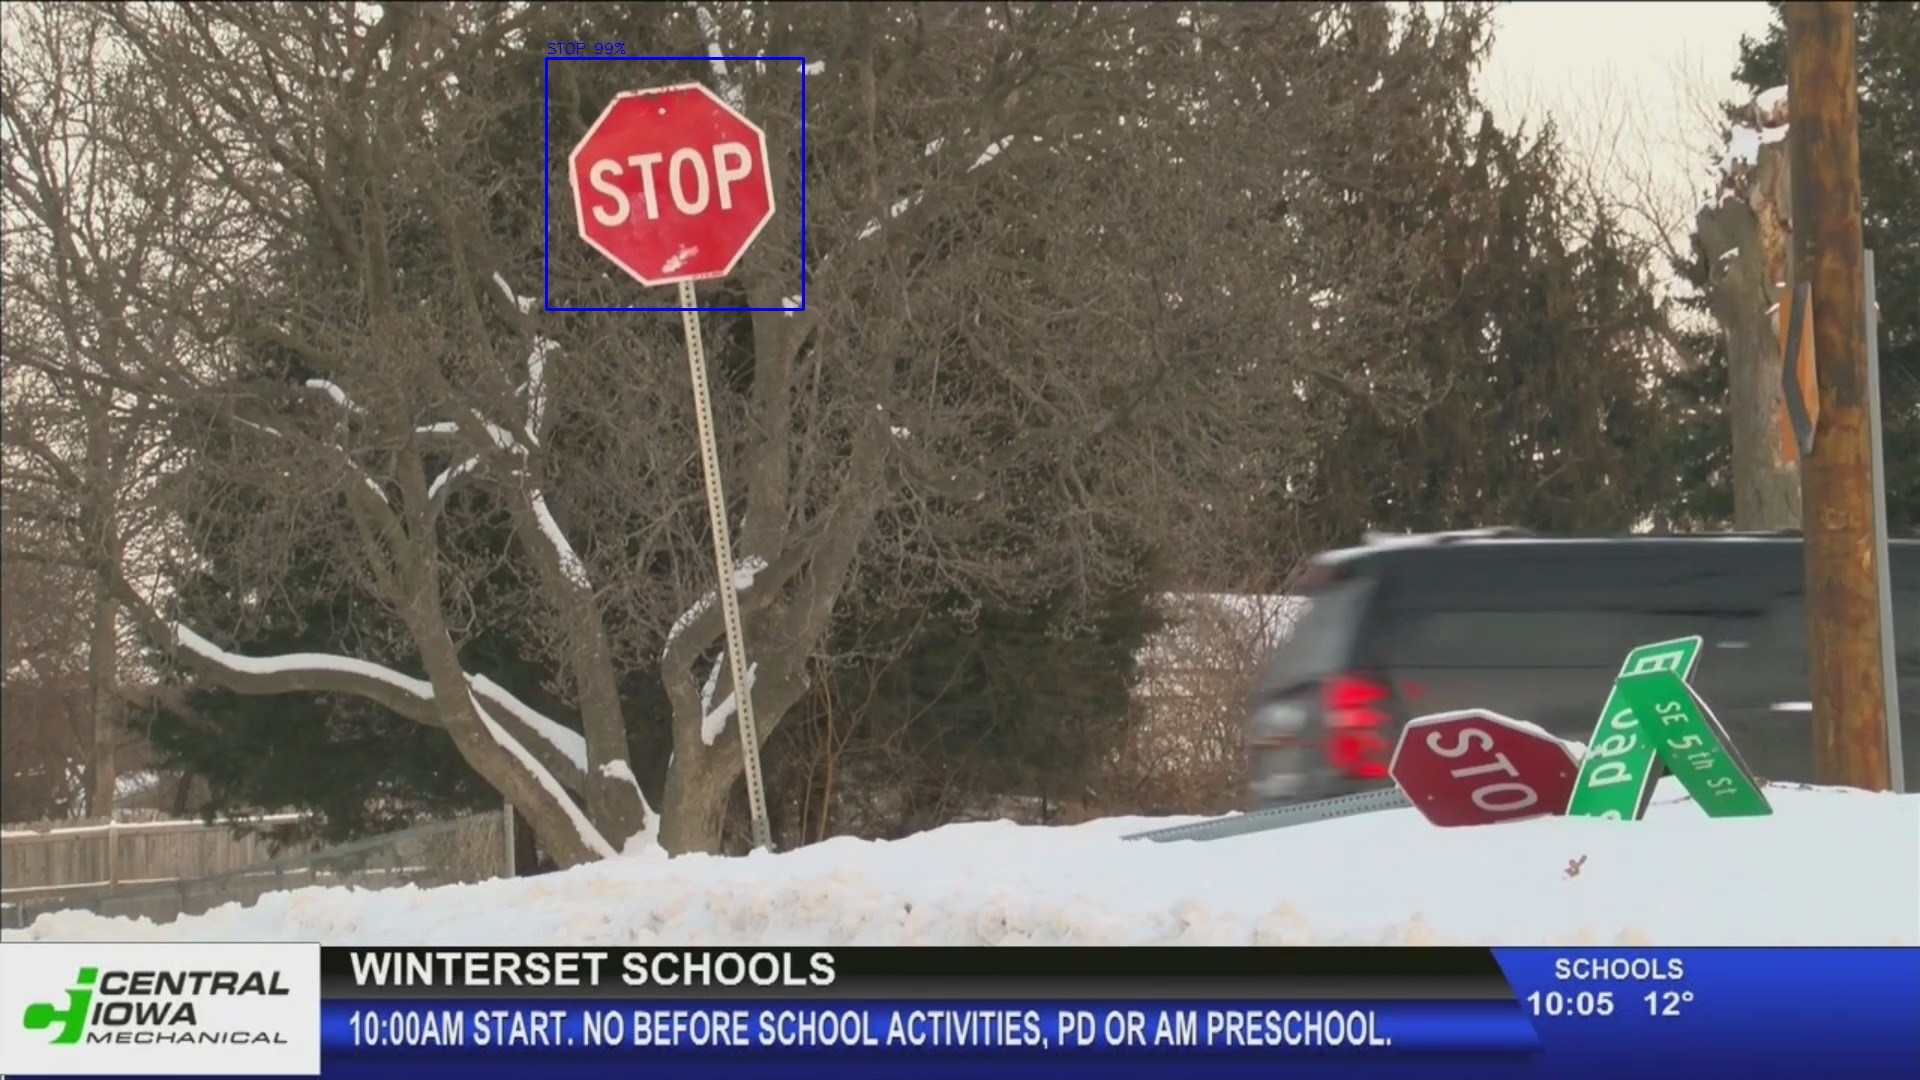

In [16]:
from IPython.display import display, Image

# display our saved imgs
display(Image(filename='./results/images/yolov4res8.jpg'))
display(Image(filename='./results/images/yolov4res11.jpg'))
display(Image(filename='./results/images/yolov4res7.jpg'))
display(Image(filename='./results/images/yolov4res9.jpg'))
display(Image(filename='./results/images/yolov4res10.jpg'))